In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
import nltk
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('punkt')

In [ ]:
import nltk

# Manually download vader_lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
fp = '/content/Dataset_Ori.xlsx'
idf = pd.read_excel(fp)
print(idf.head())


   Restaurant ID          Restaurant Name  Chain Name Occurances  \
0       18241896                     Zizo                      3   
1         309073                     Zizo                      3   
2       18336212                     Zizo                      3   
3        3400005  Time2Eat - Mama Chicken                      1   
4        2200078         Charming Chicken                      1   

   Country Code       City                                   The Full Address  \
0             1    Gurgaon              Palm Spring Plaza, Sector 54, Gurgaon   
1             1  New Delhi              K-18 & 22, Connaught Place, New Delhi   
2             1      Noida  405-406, 3rd Floor, DLF Mall Of India, Sector ...   
3             1       Agra        Main Market, Sadar Bazaar, Agra Cantt, Agra   
4             1   Amritsar  Shop 3, Opposite Nari Nikaten, Majithia Road, ...   

                               Locality  \
0                             Sector 54   
1                 

In [ ]:

idf.head(2)

,Restaurant ID,Restaurant Name,Chain Name Occurances,Country Code,City,The Full Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price Range Levels,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18241896,Zizo,3,1,Gurgaon,"Palm Spring Plaza, Sector 54, Gurgaon",Sector 54,"Sector 54, Gurgaon",77.101186,28.445485,...,Indian Rupees(Rs.),Yes,Yes,No,Medium Price,3,3.9,Yellow,Good,233
1,309073,Zizo,3,1,New Delhi,"K-18 & 22, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.219903,28.635299,...,Indian Rupees(Rs.),Yes,Yes,No,Medium Price,3,3.9,Yellow,Good,1071


In [ ]:
idf.tail(2)

,Restaurant ID,Restaurant Name,Chain Name Occurances,Country Code,City,The Full Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price Range Levels,Price range,Aggregate rating,Rating color,Rating text,Votes
9548,5800590,The Commons,1,191,Colombo,"39 A, Flower Road, Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07, Colombo",79.858105,6.908536,...,Sri Lankan Rupee(LKR),No,No,No,Medium Price,3,4.0,Green,Very Good,209
9549,5800433,The Sizzle,1,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852928,6.904581,...,Sri Lankan Rupee(LKR),No,No,No,Medium Price,3,4.2,Green,Very Good,286


Level:-3

Task:-1

Analyze the text reviews to identify the most common positive and negative keywords.

In [ ]:
rating_texts=idf['Rating text']
rating_texts

,Rating text
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
9545,Good
9546,Very Good
9547,Very Good
9548,Very Good


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# Download required resources
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Load stop words
stop_words = set(stopwords.words('english'))

# Example usage
text = "This is an amazing day!"
sentiment_score = sia.polarity_scores(text)
print("Sentiment Score:", sentiment_score)

print("Stop Words Sample:", list(stop_words)[:10])  # Print a few stop words


Sentiment Score: {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6239}
Stop Words Sample: ['on', 'by', 'shan', 'o', "shan't", 'did', 'itself', 'our', 'themselves', 'between']


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
positive=[]
negative=[]


In [ ]:
positive_counts=Counter(positive)
negative_counts=Counter(negative)

In [ ]:
num_top_keywords = 10
print('\nTop positive:')
for keyword, count in positive_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top positive:


Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [ ]:
df_analyze=idf[['Rating text','Aggregate rating']].copy()
df_analyze['Review Length']=df_analyze['Rating text'].apply(lambda x: len(str(x)))
ave_rev_len=df_analyze.groupby('Aggregate rating')['Review Length'].mean()

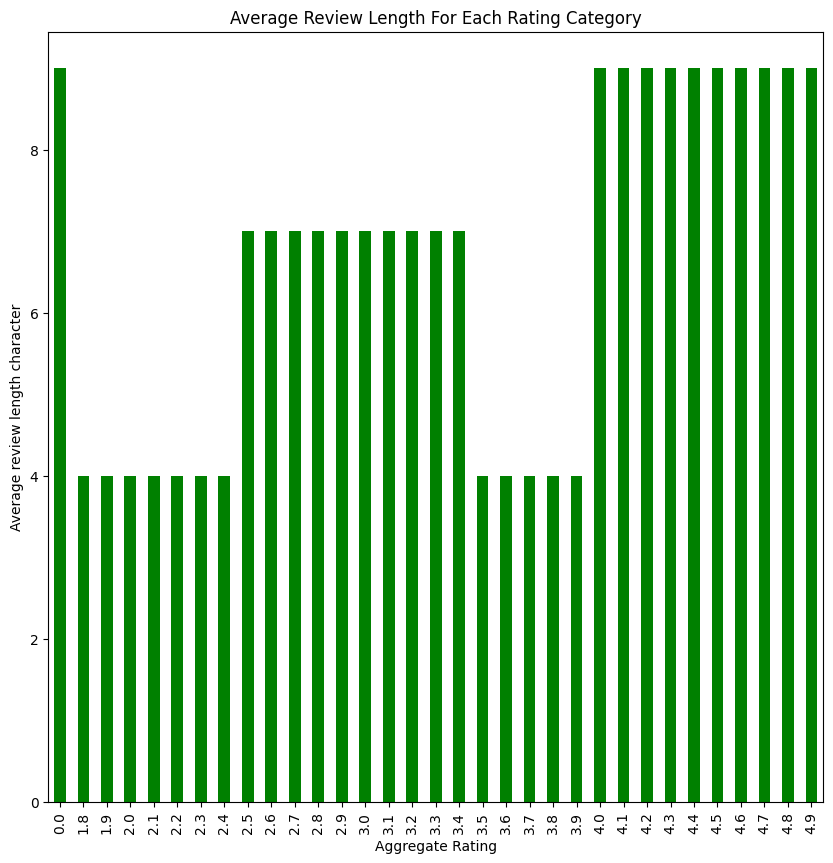

In [ ]:
plt.figure(figsize=(10,10))
ave_rev_len.plot(kind='bar',color='green')
plt.title('Average Review Length For Each Rating Category')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average review length character')
plt.show()

Task 2

Identify the restaurants with the highest and lowest number of votes.

In [ ]:
df_votes=idf[['Votes','Restaurant Name']]
df_votes

,Votes,Restaurant Name
0,233,Zizo
1,1071,Zizo
2,67,Zizo
3,94,Time2Eat - Mama Chicken
4,151,Charming Chicken
...,...,...
9545,22,The Butcher's Wife
9546,20,The Belgian Triple
9547,430,The Big Mouth
9548,209,The Commons


In [ ]:
print('Restaurant with highest Voyytes:')
max_votes=df_votes.loc[df_votes['Votes'].idxmax()]
max_votes

Restaurant with highest Voyytes:


,2446
Votes,10934
Restaurant Name,Toit


In [ ]:
print('Resaurant with lowest Votes:')
min_votes=df_votes.loc[df_votes['Votes'].idxmin()]
min_votes

Resaurant with lowest Votes:


,16
Votes,0
Restaurant Name,KitchenYard


Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [ ]:
df_analysis = idf[['Votes','Aggregate rating']].copy()
df_analysis

,Votes,Aggregate rating
0,233,3.9
1,1071,3.9
2,67,3.8
3,94,3.6
4,151,3.9
...,...,...
9545,22,3.7
9546,20,4.2
9547,430,4.3
9548,209,4.0


In [ ]:
corr=df_analysis['Votes'].corr(df_analysis["Aggregate rating"])
corr

0.3136750576277978

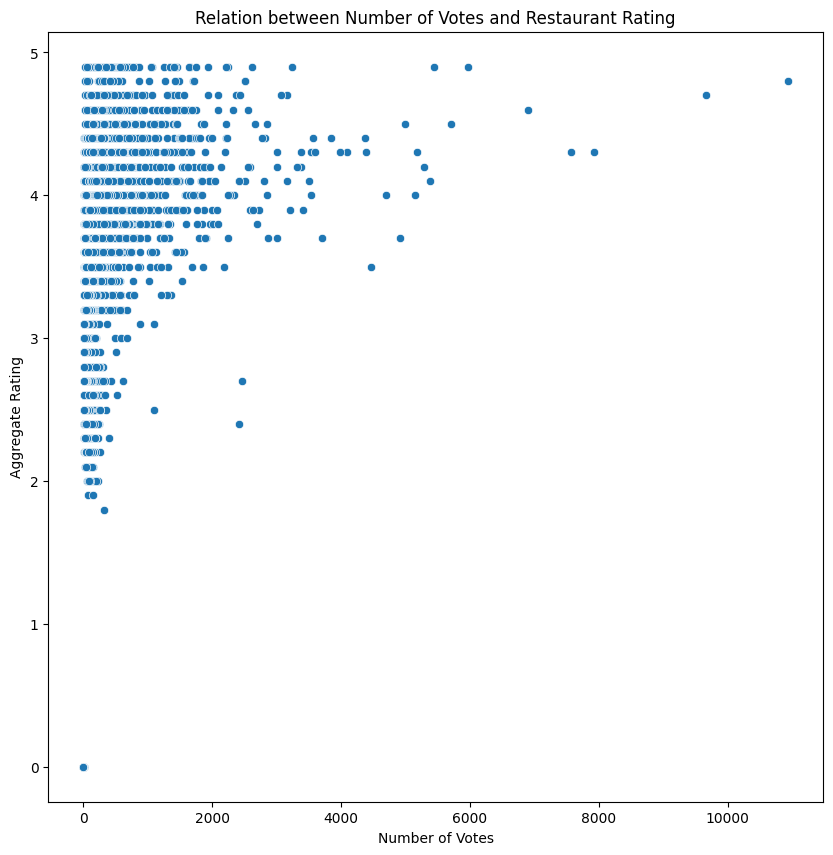

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Votes',y='Aggregate rating',data=df_analysis)
plt.title('Relation between Number of Votes and Restaurant Rating')
plt.xlabel("Number of Votes")
plt.ylabel('Aggregate Rating')
plt.show()

Task:-3

Task: Price Range vs. Online Delivery and Table Booking


Analyze if there is a relationship between the price range and the availability of online delivery and table booking

In [ ]:
idf.head(1)

,Restaurant ID,Restaurant Name,Chain Name Occurances,Country Code,City,The Full Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price Range Levels,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18241896,Zizo,3,1,Gurgaon,"Palm Spring Plaza, Sector 54, Gurgaon",Sector 54,"Sector 54, Gurgaon",77.101186,28.445485,...,Indian Rupees(Rs.),Yes,Yes,No,Medium Price,3,3.9,Yellow,Good,233


In [ ]:
idf_analysis=idf[['Price range','Has Online delivery','Has Table booking']].copy()
idf_analysis['Has Online delivery']=idf_analysis['Has Online delivery'].map({'Yes':True,'No':False})
idf_analysis['Has table booking']=idf_analysis['Has Table booking'].map({'Yes':True,'No':False})

In [ ]:
summary_table=pd.pivot_table(idf_analysis,index='Price range',values=['Has Online delivery','Has table booking'],aggfunc=sum)

In [ ]:
print('Summary Table:')
summary_table

Summary Table:


,Has Online delivery,Has table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


In [ ]:
summary_table

,Has Online delivery,Has table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


In [ ]:
idf

,Restaurant ID,Restaurant Name,Chain Name Occurances,Country Code,City,The Full Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price Range Levels,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18241896,Zizo,3,1,Gurgaon,"Palm Spring Plaza, Sector 54, Gurgaon",Sector 54,"Sector 54, Gurgaon",77.101186,28.445485,...,Indian Rupees(Rs.),Yes,Yes,No,Medium Price,3,3.9,Yellow,Good,233
1,309073,Zizo,3,1,New Delhi,"K-18 & 22, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.219903,28.635299,...,Indian Rupees(Rs.),Yes,Yes,No,Medium Price,3,3.9,Yellow,Good,1071
2,18336212,Zizo,3,1,Noida,"405-406, 3rd Floor, DLF Mall Of India, Sector ...","DLF Mall of India, Sector 18, Noida","DLF Mall of India, Sector 18, Noida, Noida",77.320979,28.566463,...,Indian Rupees(Rs.),Yes,Yes,No,Medium Price,3,3.8,Yellow,Good,67
3,3400005,Time2Eat - Mama Chicken,1,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,lower Price,2,3.6,Yellow,Good,94
4,2200078,Charming Chicken,1,1,Amritsar,"Shop 3, Opposite Nari Nikaten, Majithia Road, ...",Basant Nagar,"Basant Nagar, Amritsar",74.884384,31.644532,...,Indian Rupees(Rs.),No,No,No,poor Price,1,3.9,Yellow,Good,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,18395463,The Butcher's Wife,1,189,Cape Town,"15 Belgravia Road, Athlone, Cape Town",Athlone,"Athlone, Cape Town",18.514406,-33.964660,...,Rand(R),No,No,No,Medium Price,3,3.7,Yellow,Good,22
9546,18445944,The Belgian Triple,1,189,Pretoria,"Olympus Village, Corner Olympus Dr And Achille...",Faerie Glen,"Faerie Glen, Pretoria",28.332471,-25.798503,...,Rand(R),No,No,No,High Price,4,4.2,Green,Very Good,20
9547,6516831,The Big Mouth,1,189,Sandton,"Nelson Mandela Square, Corner Maude & 5th Stre...","Nelson Mandela Square, Sandown","Nelson Mandela Square, Sandown, Sandton",28.054667,-26.107500,...,Rand(R),No,No,No,High Price,4,4.3,Green,Very Good,430
9548,5800590,The Commons,1,191,Colombo,"39 A, Flower Road, Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07, Colombo",79.858105,6.908536,...,Sri Lankan Rupee(LKR),No,No,No,Medium Price,3,4.0,Green,Very Good,209


<Figure size 1000x800 with 0 Axes>

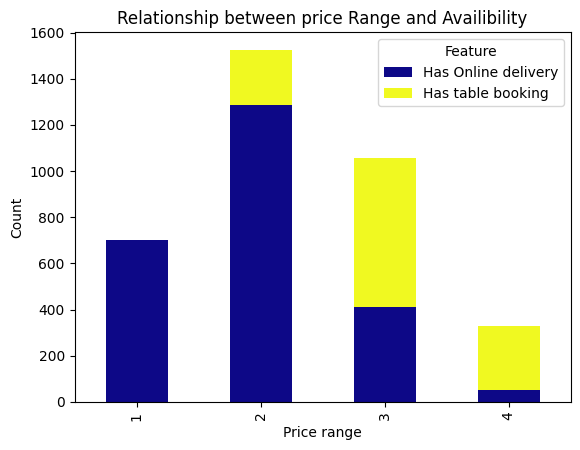

In [ ]:
plt.figure(figsize=(10,8))
summary_table.plot(kind='bar',stacked=True,colormap='plasma')
plt.title('Relationship between price Range and Availibility')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.legend(title='Feature',loc='upper right')
plt.show()


Determine if higher-priced restaurants are more likely to offer these services

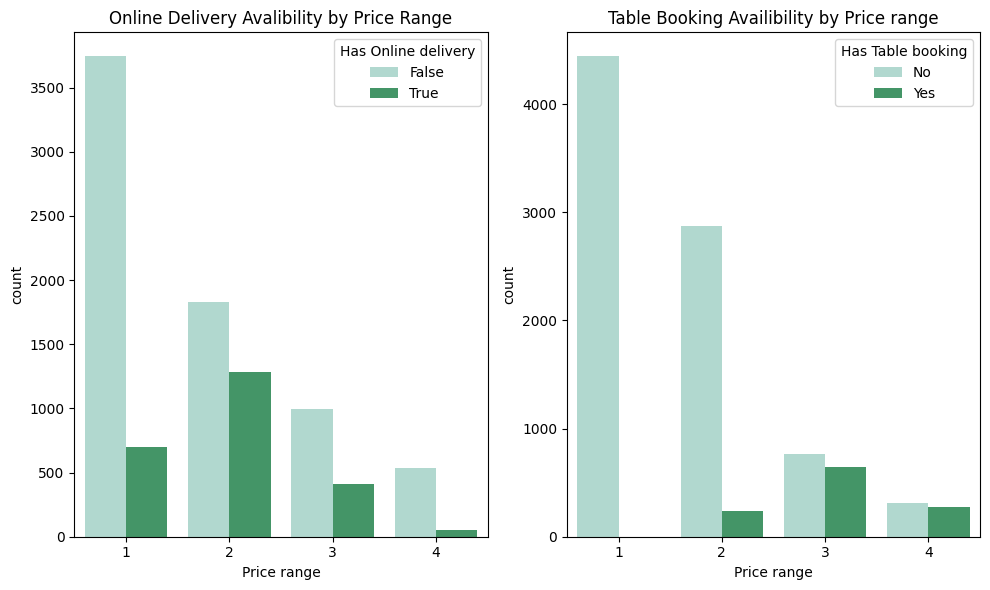

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)

sns.countplot(x='Price range' , hue='Has Online delivery' , data=idf_analysis,palette='BuGn')
plt.title('Online Delivery Avalibility by Price Range')

plt.subplot(1,2,2)
sns.countplot(x='Price range', hue='Has Table booking', data=idf_analysis,palette='BuGn')
plt.title('Table Booking Availibility by Price range')

plt.tight_layout()
plt.show()